In [1]:
#Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [2]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 388nm Graphs and Peak Difference

In [3]:
df = pd.read_csv('HD_656_3.csv')
df = df.reset_index(drop = True)
df.columns=['ds','nA']

In [4]:
yhat=savitzky_golay(np.asarray(df.nA),50001,3)
df['yhat'] = yhat

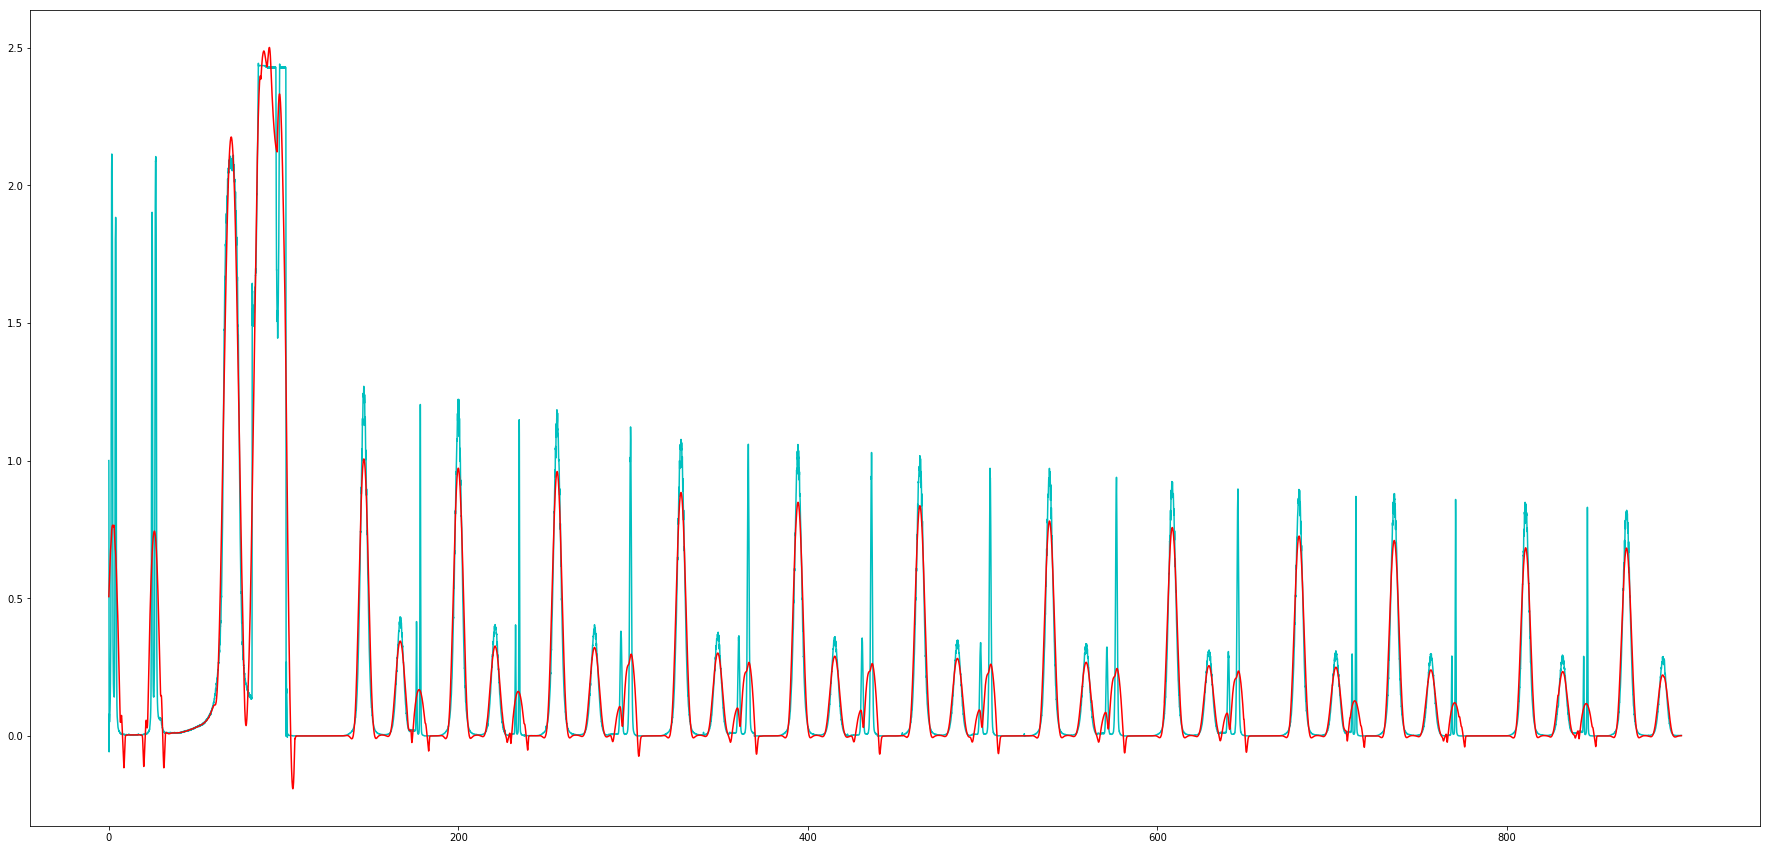

In [5]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

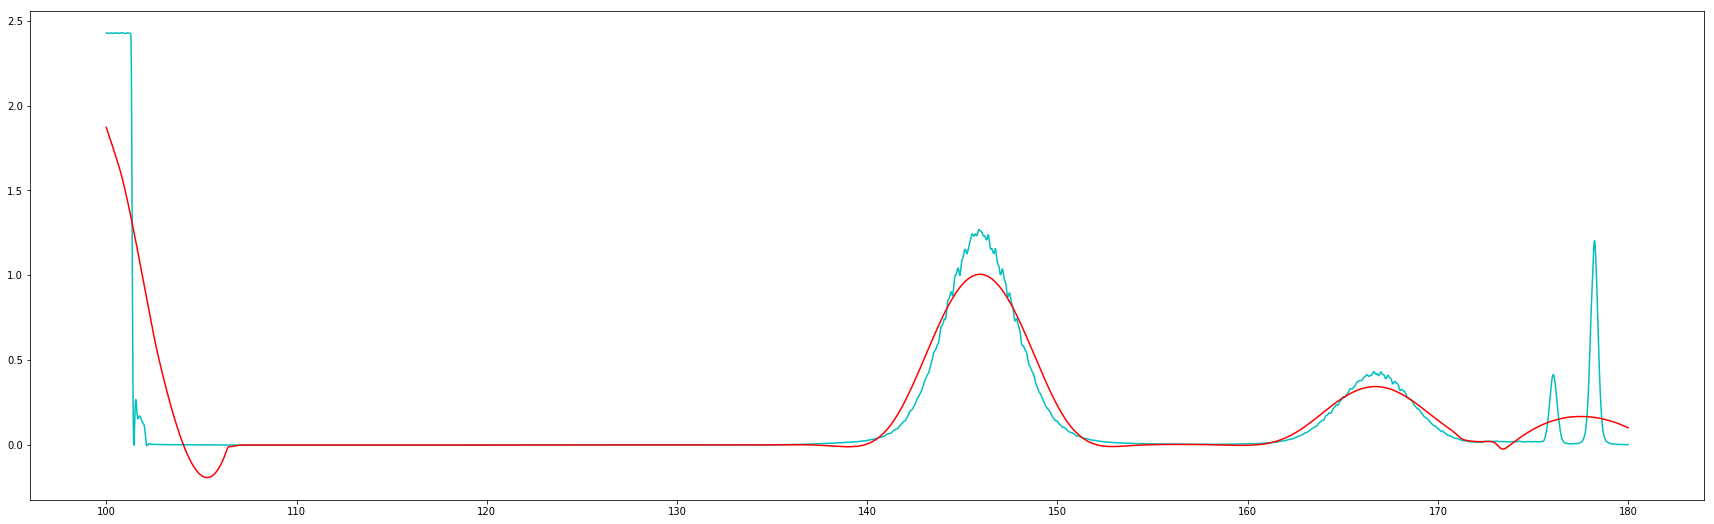

In [6]:
dfx = df[(df.ds < 180) & (df.ds >100)]
plt.figure(figsize=(30,9))
plt.plot(dfx.ds, dfx.nA, 'c')
plt.plot(dfx.ds, dfx.yhat, 'r')
plt.show()